/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/speed120
Column 'self_speed' not found in 120-server.csv
/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/speed100
Column 'self_speed' not found in 100-server.csv
/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/speed30
Column 'self_speed' not found in 30-server.csv
/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/speed130
Column 'self_speed' not found in 130-server.csv
/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/speed70
Column 'self_speed' not found in 70-server.csv
/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/speed110
Column 'self_speed' not found in 110-server.csv


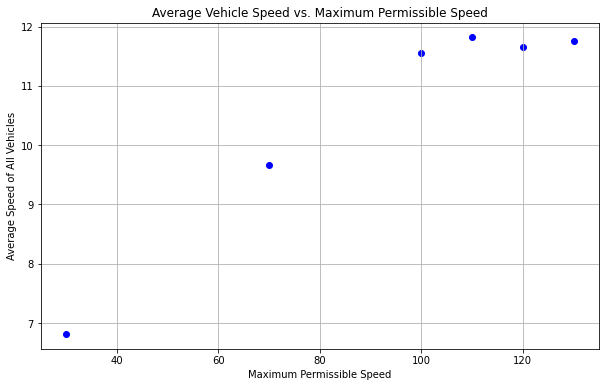

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_files(directory):
    """
    Process CSV files in the specified directory.
    Assumes subdirectories are named after the maximum speeds (e.g., speed30, speed40)
    and that each CSV file has a column 'self_speed' for vehicle speeds.
    """
    average_speeds = []
    
    
    
    

    # Iterate through each subdirectory in the parent directory
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        print(subdir_path)
        # Check if it's a directory
        if os.path.isdir(subdir_path):
            # Process each file in the subdirectory
            for filename in os.listdir(subdir_path):
                if filename.endswith('.csv'):
                    # Extract the maximum permissible speed from the filename
                    max_perm_speed = int(filename.split('-')[0])
                    
                    # Read the CSV file
                    filepath = os.path.join(subdir_path, filename)
                    
                    try:
                        data = pd.read_csv(filepath)
                        # Check if 'self_speed' column exists
                        if 'self_speed' in data.columns:
                            avg_speed = data['self_speed'].mean()
                            average_speeds.append((max_perm_speed, avg_speed))
                        else:
                            print(f"Column 'self_speed' not found in {filename}")
                    except Exception as e:
                        print(f"Error processing file {filename}: {e}")

    return average_speeds






def plot_average_speeds(average_speeds):
    """
    Plots the average speeds against the maximum permissible speeds.
    """
    # Convert list to DataFrame
    df = pd.DataFrame(average_speeds, columns=['Max_Permissible_Speed', 'Average_Speed'])

    # Group by Max_Permissible_Speed to average the speeds
    grouped_data = df.groupby('Max_Permissible_Speed')['Average_Speed'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(grouped_data['Max_Permissible_Speed'], grouped_data['Average_Speed'], color='blue')
    plt.title('Average Vehicle Speed vs. Maximum Permissible Speed')
    plt.xlabel('Maximum Permissible Speed')
    plt.ylabel('Average Speed of All Vehicles')
    plt.grid(True)
    plt.show()

# Parent directory where the subdirectories are stored (change as needed)
parent_directory = '/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10'

# Process the files and plot the results
average_speeds = process_files(parent_directory)
plot_average_speeds(average_speeds)

In [ ]:
pip install panads

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define constants for the number of vehicles and road length
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856

# Define a function to process the CSV files and extract the necessary data
def process_files(directory):
    traffic_data = []

    # Process the server file for each speed
    for speed_dir in os.listdir(directory):
        if speed_dir.startswith('speed'):
            speed = int(speed_dir.replace('speed', ''))
            server_filepath = os.path.join(directory, f"{speed}-server.csv")
            
            try:
                # Process server file
                server_data = pd.read_csv(server_filepath)
                cam_received = server_data['CAM Received'].sum()
                denm_sent = server_data['DENM Sent'].sum()

                # Calculate traffic load per vehicle per km
                cam_received_traffic = cam_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                denm_sent_traffic = denm_sent / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                
                traffic_data.append((speed, 'CAM Received', cam_received_traffic))
                traffic_data.append((speed, 'DENM Sent', denm_sent_traffic))
            except Exception as e:
                print(f"Could not process server file for speed {speed}: {e}")

            # Process vehicle files
            for veh_file in os.listdir(os.path.join(directory, speed_dir)):
                if veh_file.endswith('.csv') and 'veh' in veh_file:
                    veh_filepath = os.path.join(directory, speed_dir, veh_file)
                    try:
                        # Process vehicle file
                        veh_data = pd.read_csv(veh_filepath)
                        denms_received = veh_data['DENMs Received'].sum()

                        # Calculate traffic load per vehicle per km
                        denms_received_traffic = denms_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)

                        traffic_data.append((speed, 'DENMs Received', denms_received_traffic))
                    except Exception as e:
                        print(f"Could not process vehicle file {veh_file}: {e}")

    return traffic_data

# Function to plot the graph
def plot_traffic(traffic_data):
    # Convert list to DataFrame
    df = pd.DataFrame(traffic_data, columns=['Speed', 'Traffic_Type', 'Traffic_Load'])

    # Pivot DataFrame to have separate columns for each traffic type
    pivot_df = df.pivot_table(index='Speed', columns='Traffic_Type', values='Traffic_Load', aggfunc='sum')

    # Plotting
    pivot_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Uplink and Downlink Traffic Load per Vehicle per Km')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Traffic Load (units per vehicle per km)')
    plt.legend(title='Traffic Type')
    plt.tight_layout()
    plt.show()

# Directory where the files are stored
directory = '/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10'

# Process the files and plot the results
traffic_data = process_files(directory)
plot_traffic(traffic_data)


Could not process server file for speed 120: [Errno 2] No such file or directory: '/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10/120-server.csv'
Could not process vehicle file 120-veh6.csv: 'DENMs Received'
Could not process vehicle file 120-veh3.csv: 'DENMs Received'
Could not process vehicle file 120-veh2.csv: 'DENMs Received'
Could not process vehicle file 120-veh9.csv: 'DENMs Received'
Could not process vehicle file 120-veh1.csv: 'DENMs Received'
Could not process vehicle file 120-veh10.csv: 'DENMs Received'
Could not process vehicle file 120-veh7.csv: 'DENMs Received'
Could not process vehicle file 120-veh5.csv: 'DENMs Received'
Could not process vehicle file 120-veh4.csv: 'DENMs Received'
Could not process vehicle file 120-veh8.csv: 'DENMs Received'
Could not process server file for speed 100: [Errno 2] No such file or directory: '/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Result

TypeError: no numeric data to plot

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Constants for the number of vehicles and road length
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856

# Function to process server and vehicle files within a given speed directory
def process_speed_directory(speed_dir_path):
    traffic_data = []

    # Extract the speed value from the directory name
    speed = int(os.path.basename(speed_dir_path).replace('speed', ''))

    # Process the server file
    server_filepath = os.path.join(speed_dir_path, f"{speed}-server.csv")
    try:
        server_data = pd.read_csv(server_filepath)
        cam_received = server_data['CAM Received'].sum()
        denm_sent = server_data['DENM Sent'].sum()

        # Traffic load per vehicle per km
        cam_received_traffic = cam_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
        denm_sent_traffic = denm_sent / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
        
        traffic_data.append((speed, 'CAM Received', cam_received_traffic))
        traffic_data.append((speed, 'DENM Sent', denm_sent_traffic))
    except Exception as e:
        print(f"Could not process server file at {server_filepath}: {e}")

    # Process vehicle files
    for veh_filename in os.listdir(speed_dir_path):
        if veh_filename.startswith(f"{speed}-veh") and veh_filename.endswith('.csv'):
            veh_filepath = os.path.join(speed_dir_path, veh_filename)
            try:
                veh_data = pd.read_csv(veh_filepath)
                denms_received = veh_data['DENMs Received'].sum()

                # Traffic load per vehicle per km
                denms_received_traffic = denms_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)

                traffic_data.append((speed, 'DENMs Received', denms_received_traffic))
            except Exception as e:
                print(f"Could not process vehicle file at {veh_filepath}: {e}")

    return traffic_data

# Function to plot the graph
def plot_traffic(traffic_data):
    # Convert to DataFrame
    df = pd.DataFrame(traffic_data, columns=['Speed', 'Traffic_Type', 'Traffic_Load'])

    # Pivot for plotting
    pivot_df = df.pivot_table(index='Speed', columns='Traffic_Type', values='Traffic_Load', aggfunc='sum')

    # Plot
    pivot_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Uplink and Downlink Traffic Load per Vehicle per Km')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Traffic Load (units per vehicle per km)')
    plt.legend(title='Traffic Type')
    plt.tight_layout()
    plt.show()

# Main directory where the simulation result directories are stored
main_directory = '/home/Desktop/Final_PRoject_withoutRL/V2I_WorkingVersion1.3/ms-van3t/ns-3-dev/src/Sim_Results_TimeVal_10'

# Aggregate traffic data from all simulations
all_traffic_data = []

# Process each simulation results directory
for time_val_dir_name in os.listdir(main_directory):
    time_val_dir_path = os.path.join(main_directory, time_val_dir_name)

    # Check if it's a directory corresponding to a simulation result
    if os.path.isdir(time_val_dir_path) and time_val_dir_name.startswith('Sim_Results_TimeVal_'):
        # Iterate over each 'speedXX' directory within the simulation result directory
        for speed_dir_name in os.listdir(time_val_dir_path):
            speed_dir_path = os.path.join(time_val_dir_path, speed_dir_name)

            # Process this speed directory if it's indeed a directory
            if os.path.isdir(speed_dir_path) and speed_dir_name.startswith('speed'):
                speed_traffic_data = process_speed_directory(speed_dir_path)
                all_traffic_data.extend(speed_traffic_data)

# Plot the aggregated traffic data
plot_traffic(all_traffic_data)


TypeError: no numeric data to plot

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import xml.etree.ElementTree as ET

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4'

def process_speed_dir(speed_dir):
    traffic_data = []
    average_speeds = []
    collisions = 0

    # Extract the speed value from the directory name
    speed = int(os.path.basename(speed_dir).replace('speed', ''))

    # List all files in the directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        # Process CSV files
        if file.endswith('.csv') and 'veh' in file:
            try:
                data = pd.read_csv(file_path)

                # Check if it's a server file or a vehicle file
                if 'server' in file:
                    # Server file processing
                    cam_received = data['CAM Received'].sum()
                    denm_sent = data['DENM Sent'].sum()

                    # Calculate traffic load per vehicle per km
                    cam_received_traffic = cam_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                    denm_sent_traffic = denm_sent / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)

                    traffic_data.append((speed, 'CAM Received', cam_received_traffic))
                    traffic_data.append((speed, 'DENM Sent', denm_sent_traffic))
                else:
                    # Vehicle file processing
                    if 'number_of_denm_received' in data.columns:
                        denms_received = data['number_of_denm_received'].sum()
                        average_speed = data['self_speed'].mean()

                        # Calculate traffic load per vehicle per km
                        denms_received_traffic = denms_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                        average_speeds.append((speed, average_speed))

                        traffic_data.append((speed, 'DENMs Received', denms_received_traffic))
                    else:
                        print(f"Column 'number_of_denm_received' not found in {file}")

            except Exception as e:
                print(f"Error processing file {file}: {e}")

        # Process XML files for collisions
        elif file.endswith('.xml'):
            tree = ET.parse(file_path)
            root = tree.getroot()
            collisions += sum(1 for _ in root.iter('collision'))

    return traffic_data, average_speeds, collisions


# Function to process all directories and aggregate data
def process_all_dirs(main_dir):
    all_traffic_data = []
    all_average_speeds = []
    all_collisions_data = []

    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        # Process each speed directory within the time_val_folder
        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue

            # Process files in speed directory
            traffic_data, average_speeds, collisions = process_speed_dir(speed_path)
            all_traffic_data.extend(traffic_data)
            all_average_speeds.extend(average_speeds)
            speed = int(speed_folder.replace('speed', ''))
            all_collisions_data.append((speed, collisions))
            
             # Add this within the for loop where XML files are processed
            if file.endswith('.xml'):
                try:
                    tree = ET.parse(file_path)
                    root = tree.getroot()
                    collisions += sum(1 for _ in root.iter('collision'))
                except ET.ParseError as pe:
                    print(f"Parse error in file {file}: {pe}")
                except Exception as e:
                    print(f"General error processing file {file}: {e}")
            

    return all_traffic_data, all_average_speeds, all_collisions_data



# Plotting function for collisions
def plot_collisions(collisions_data):
    df = pd.DataFrame(collisions_data, columns=['Speed', 'Collisions'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='bar', figsize=(12, 8), color='red', legend=False)
    plt.title('Number of Collisions at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Number of Collisions')
    plt.tight_layout()
    plt.show()

# Main execution
traffic_data, average_speeds, collisions_data = process_all_dirs(MAIN_DIR)
plot_traffic_data(traffic_data)
plot_average_speeds(average_speeds)
plot_collisions(collisions_data)








# Plotting function for traffic data
def plot_traffic_data(traffic_data):
    df = pd.DataFrame(traffic_data, columns=['Speed', 'Traffic_Type', 'Traffic_Load'])
    pivot_df = df.pivot_table(index='Speed', columns='Traffic_Type', values='Traffic_Load', aggfunc='sum')
    pivot_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Uplink and Downlink Traffic Load per Vehicle per Km')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Traffic Load (units per vehicle per km)')
    plt.legend(title='Traffic Type')
    plt.tight_layout()
    plt.show()

# Plotting function for average speeds
def plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

Column 'number_of_denm_received' not found in 120-veh6.csv
Column 'number_of_denm_received' not found in 120-veh3.csv
Column 'number_of_denm_received' not found in 120-veh2.csv
Column 'number_of_denm_received' not found in 120-veh9.csv
Column 'number_of_denm_received' not found in 120-veh1.csv
Column 'number_of_denm_received' not found in 120-veh10.csv
Column 'number_of_denm_received' not found in 120-veh7.csv


ParseError: syntax error: line 1, column 0 (<string>)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import xml.etree.ElementTree as ET

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4'

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import xml.etree.ElementTree as ET

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4'

def process_speed_dir(speed, speed_dir):
    traffic_data = []
    average_speeds = []
    collisions = 0

    # List all files in the directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        # Process CSV files
        if file.endswith('.csv'):
            try:
                data = pd.read_csv(file_path)

                # Check if it's a server file or a vehicle file
                if 'server' in file:
                    # Server file processing
                    cam_received = data['CAM Received'].sum()
                    denm_sent = data['DENM Sent'].sum()

                    # Calculate traffic load per vehicle per km
                    cam_received_traffic = cam_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                    denm_sent_traffic = denm_sent / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)

                    traffic_data.append((speed, 'CAM Received', cam_received_traffic))
                    traffic_data.append((speed, 'DENM Sent', denm_sent_traffic))
                else:
                    # Vehicle file processing
                    if 'number_of_denm_received' in data.columns:
                        denms_received = data['number_of_denm_received'].sum()
                        average_speed = data['self_speed'].mean()

                        # Calculate traffic load per vehicle per km
                        denms_received_traffic = denms_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                        average_speeds.append((speed, average_speed))

                        traffic_data.append((speed, 'DENMs Received', denms_received_traffic))
                    else:
                        print(f"Column 'number_of_denm_received' not found in {file}")

            except Exception as e:
                print(f"Error processing file {file}: {e}")

        # Process XML files for collisions
        elif file.endswith('.xml'):
            try:
                tree = ET.parse(file_path)
                root = tree.getroot()
                collisions += sum(1 for _ in root.iter('collision'))
            except ET.ParseError as pe:
                print(f"Parse error in file {file}: {pe}")
            except Exception as e:
                print(f"General error processing file {file}: {e}")

    return traffic_data, average_speeds, collisions

def process_all_dirs(main_dir):
    all_traffic_data = []
    all_average_speeds = []
    all_collisions_data = []

    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue
            
            speed = int(speed_folder.replace('speed', ''))  # Extract speed value from folder name

            traffic_data, average_speeds, collisions = process_speed_dir(speed, speed_path)
            all_traffic_data.extend(traffic_data)
            all_average_speeds.extend(average_speeds)
            all_collisions_data.append((speed, collisions))

    return all_traffic_data, all_average_speeds, all_collisions_data

def plot_traffic_data(traffic_data):
    df = pd.DataFrame(traffic_data, columns=['Speed', 'Traffic_Type', 'Traffic_Load'])
    pivot_df = df.pivot_table(index='Speed', columns='Traffic_Type', values='Traffic_Load', aggfunc='sum')
    pivot_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Uplink and Downlink Traffic Load per Vehicle per Km')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Traffic Load (units per vehicle per km)')
    plt.legend(title='Traffic Type')
    plt.tight_layout()
    plt.show()

def plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

def plot


SyntaxError: invalid syntax (1756612351.py, line 125)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import xml.etree.ElementTree as ET

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4'

def process_speed_dir(speed, speed_dir):
    traffic_data = []
    average_speeds = []
    collisions = 0

    # List all files in the directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        # Process CSV files
        if file.endswith('.csv'):
            try:
                data = pd.read_csv(file_path)

                # Check if it's a server file or a vehicle file
                if 'server' in file:
                    # Server file processing
                    cam_received = data['CAM Received'].sum()
                    denm_sent = data['DENM Sent'].sum()

                    # Calculate traffic load per vehicle per km
                    cam_received_traffic = cam_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                    denm_sent_traffic = denm_sent / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)

                    traffic_data.append((speed, 'CAM Received', cam_received_traffic))
                    traffic_data.append((speed, 'DENM Sent', denm_sent_traffic))
                else:
                    # Vehicle file processing
                    if 'number_of_denm_received' in data.columns:
                        denms_received = data['number_of_denm_received'].sum()
                        average_speed = data['self_speed'].mean()

                        # Calculate traffic load per vehicle per km
                        denms_received_traffic = denms_received / (NUMBER_OF_VEHICLES * ROAD_LENGTH_KM)
                        average_speeds.append((speed, average_speed))

                        traffic_data.append((speed, 'DENMs Received', denms_received_traffic))
                    else:
                        print(f"Column 'number_of_denm_received' not found in {file}")

            except Exception as e:
                print(f"Error processing file {file}: {e}")

        # Process XML files for collisions
        elif file.endswith('.xml'):
            try:
                tree = ET.parse(file_path)
                root = tree.getroot()
                collisions += sum(1 for _ in root.iter('collision'))
            except ET.ParseError as pe:
                print(f"Parse error in file {file}: {pe}")
            except Exception as e:
                print(f"General error processing file {file}: {e}")

    return traffic_data, average_speeds, collisions

def process_all_dirs(main_dir):
    all_traffic_data = []
    all_average_speeds = []
    all_collisions_data = []

    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue
            
            speed = int(speed_folder.replace('speed', ''))  # Extract speed value from folder name

            traffic_data, average_speeds, collisions = process_speed_dir(speed, speed_path)
            all_traffic_data.extend(traffic_data)
            all_average_speeds.extend(average_speeds)
            all_collisions_data.append((speed, collisions))

    return all_traffic_data, all_average_speeds, all_collisions_data


def plot_traffic_data(traffic_data):
    df = pd.DataFrame(traffic_data, columns=['Speed', 'Traffic_Type', 'Traffic_Load'])
    pivot_df = df.pivot_table(index='Speed', columns='Traffic_Type', values='Traffic_Load', aggfunc='sum')
    pivot_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Uplink and Downlink Traffic Load per Vehicle per Km')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Traffic Load (units per vehicle per km)')
    plt.legend(title='Traffic Type')
    plt.tight_layout()
    plt.show()

def plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

def plot_collisions(collisions_data):
    df = pd.DataFrame(collisions_data, columns=['Speed', 'Collisions'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='bar', figsize=(12, 8), color='red', legend=False)
    plt.title('Number of Collisions at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Number of Collisions')
    plt.tight_layout()
    plt.show()

# Main execution
traffic_data, average_speeds, collisions_data = process_all_dirs(MAIN_DIR)
plot_traffic_data(traffic_data)
plot_average_speeds(average_speeds)
plot_collisions(collisions_data)


Column 'number_of_denm_received' not found in 120-veh6.csv
Column 'number_of_denm_received' not found in 120-veh3.csv
Column 'number_of_denm_received' not found in 120-veh2.csv
Column 'number_of_denm_received' not found in 120-veh9.csv
Column 'number_of_denm_received' not found in 120-veh1.csv
Column 'number_of_denm_received' not found in 120-veh10.csv
Column 'number_of_denm_received' not found in 120-veh7.csv
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Column 'number_of_denm_received' not found in 120-veh5.csv
Column 'number_of_denm_received' not found in 120-veh4.csv
Error processing file 120-server.csv: 'CAM Received'
Column 'number_of_denm_received' not found in 120-veh8.csv
Column 'number_of_denm_received' not found in 100-veh1.csv
Column 'number_of_denm_received' not found in 100-veh5.csv
Column 'number_of_denm_received' not found in 100-veh6.csv
Column 'number_of_denm_received' not found in 100-veh8.csv
Column 'number_of_denm_received' not f

Column 'number_of_denm_received' not found in 100-veh7.csv
Column 'number_of_denm_received' not found in 30-veh4.csv
Column 'number_of_denm_received' not found in 30-veh1.csv
Column 'number_of_denm_received' not found in 30-veh7.csv
Column 'number_of_denm_received' not found in 30-veh3.csv
Error processing file 30-server.csv: 'CAM Received'
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Column 'number_of_denm_received' not found in 30-veh9.csv
Column 'number_of_denm_received' not found in 30-veh8.csv
Column 'number_of_denm_received' not found in 30-veh6.csv
Column 'number_of_denm_received' not found in 30-veh2.csv
Column 'number_of_denm_received' not found in 30-veh5.csv
Column 'number_of_denm_received' not found in 30-veh10.csv
Column 'number_of_denm_received' not found in 130-veh3.csv
Column 'number_of_denm_received' not found in 130-veh9.csv
Column 'number_of_denm_received' not found in 130-veh7.csv
Column 'number_of_denm_received' not found in 130

Column 'number_of_denm_received' not found in 100-veh2.csv
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Column 'number_of_denm_received' not found in 100-veh9.csv
Column 'number_of_denm_received' not found in 100-veh3.csv
Error processing file 100-server.csv: 'CAM Received'
Column 'number_of_denm_received' not found in 100-veh4.csv
Column 'number_of_denm_received' not found in 100-veh10.csv
Column 'number_of_denm_received' not found in 100-veh7.csv
Column 'number_of_denm_received' not found in 30-veh4.csv
Column 'number_of_denm_received' not found in 30-veh1.csv
Column 'number_of_denm_received' not found in 30-veh7.csv
Column 'number_of_denm_received' not found in 30-veh3.csv
Error processing file 30-server.csv: 'CAM Received'
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Column 'number_of_denm_received' not found in 30-veh9.csv
Column 'number_of_denm_received' not found in 30-veh8.csv
Column 'number_of_denm_recei

TypeError: no numeric data to plot

In [4]:
#network parameters:

import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the main directory and subdirectories for different speeds
main_dir = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4/Sim_Results_TimeVal_10'  # Replace with your main directory path
speed_folders = ['speed30', 'speed110', 'speed70', 'speed100','speed120','speed130']  # List all speed folders

# Initialize data structures to store results
average_speeds = []
packet_drop_ratios = []
average_latencies = []

# Process each speed folder
for speed_folder in speed_folders:
    speed = int(speed_folder.replace('speed', ''))  # Extract speed value
    speed_dir = os.path.join(main_dir, speed_folder)

    # Initialize variables for calculations
    total_denms_sent = 0
    total_denms_received = 0
    total_latency = 0
    vehicle_count = 0

    # Process each file in the speed directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        if file.endswith('.csv'):
            data = pd.read_csv(file_path)

            if 'server' in file:
                total_denms_sent += data['denm_sent'].sum()
            else:
                total_denms_received += data['number_of_denm_received'].sum()
                total_latency += data['average_latency'].mean()
                vehicle_count += 1

    # Calculate average speed, packet drop ratio, and average latency for this speed
    average_speed = total_latency / vehicle_count
    packet_drop_ratio = (total_denms_sent - total_denms_received) / total_denms_sent if total_denms_sent > 0 else 0
    average_latency = total_latency / vehicle_count

    # Append results to lists
    average_speeds.append((speed, average_speed))
    packet_drop_ratios.append((speed, packet_drop_ratio))
    average_latencies.append((speed, average_latency))

# Convert results to DataFrames for plotting
df_speeds = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
df_packet_drop = pd.DataFrame(packet_drop_ratios, columns=['Speed', 'Packet_Drop_Ratio'])
df_latencies = pd.DataFrame(average_latencies, columns=['Speed', 'Average_Latency'])

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_speeds['Speed'], df_speeds['Average_Speed'], marker='o')
plt.title('Average Speed vs Maximum Speed')
plt.xlabel('Maximum Speed')
plt.ylabel('Average Speed')

plt.subplot(1, 2, 2)
plt.plot(df_latencies['Speed'], df_latencies['Average_Latency'], marker='o', color='green')
plt.title('Average Latency vs Maximum Speed')
plt.xlabel('Maximum Speed')
plt.ylabel('Average Latency')

plt.tight_layout()
plt.show()



KeyError: 'number_of_denm_received'

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# Define the main directory and subdirectories for different speeds
main_dir = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4/Sim_Results_TimeVal_10'  # Replace with your main directory path
speed_folders = ['speed30', 'speed110', 'speed70', 'speed100','speed120','speed130']  # List all speed folders
# Initialize data structures to store results
average_speeds = []
packet_drop_ratios = []
average_latencies = []

# Function to extract the 'number_of_denm_sent' from server CSV files
def extract_denm_sent(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Assuming the number_of_denm_sent is in the last line, modify if needed
        last_line = lines[-1].strip()
        return int(last_line.split()[-1])  # Modify this as per the actual file format

# Process each speed folder
for speed_folder in speed_folders:
    speed = int(speed_folder.replace('speed', ''))  # Extract speed value
    speed_dir = os.path.join(main_dir, speed_folder)

    # Initialize variables for calculations
    total_denms_sent = 0
    total_denms_received = 0
    total_latency = 0
    vehicle_count = 0

    # Process each file in the speed directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        if file.endswith('.csv'):
            data = pd.read_csv(file_path)

            if 'server' in file:
                total_denms_sent += extract_denm_sent(file_path)
            else:
                total_denms_received += data['number_of_denm_received'].sum()
                total_latency += data['average_latency'].mean()
                vehicle_count += 1

    # Calculate average speed, packet drop ratio, and average latency for this speed
    average_speed = total_latency / vehicle_count
    packet_drop_ratio = (total_denms_sent - total_denms_received) / total_denms_sent if total_denms_sent > 0 else 0
    average_latency = total_latency / vehicle_count

    # Append results to lists
    average_speeds.append((speed, average_speed))
    packet_drop_ratios.append((speed, packet_drop_ratio))
    average_latencies.append((speed, average_latency))

# Convert results to DataFrames for plotting
df_speeds = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
df_packet_drop = pd.DataFrame(packet_drop_ratios, columns=['Speed', 'Packet_Drop_Ratio'])
df_latencies = pd.DataFrame(average_latencies, columns=['Speed', 'Average_Latency'])

# Print consolidated packet drop ratios
print("Consolidated Packet Drop Ratios:")
print(df_packet_drop)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_speeds['Speed'], df_speeds['Average_Speed'], marker='o')
plt.title('Average Speed vs Maximum Speed')
plt.xlabel('Maximum Speed')
plt.ylabel('Average Speed')

plt.subplot(1, 2, 2)
plt.plot(df_latencies['Speed'], df_latencies['Average_Latency'], marker='o', color='green')
plt.title('Average Latency vs Maximum Speed')
plt.xlabel('Maximum Speed')
plt.ylabel('Average Latency')

plt.tight_layout()
plt.show()


KeyError: 'number_of_denm_received'

Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in file sumo-errors-or-collisions.xml: syntax error: line 1, column 0
Parse error in f

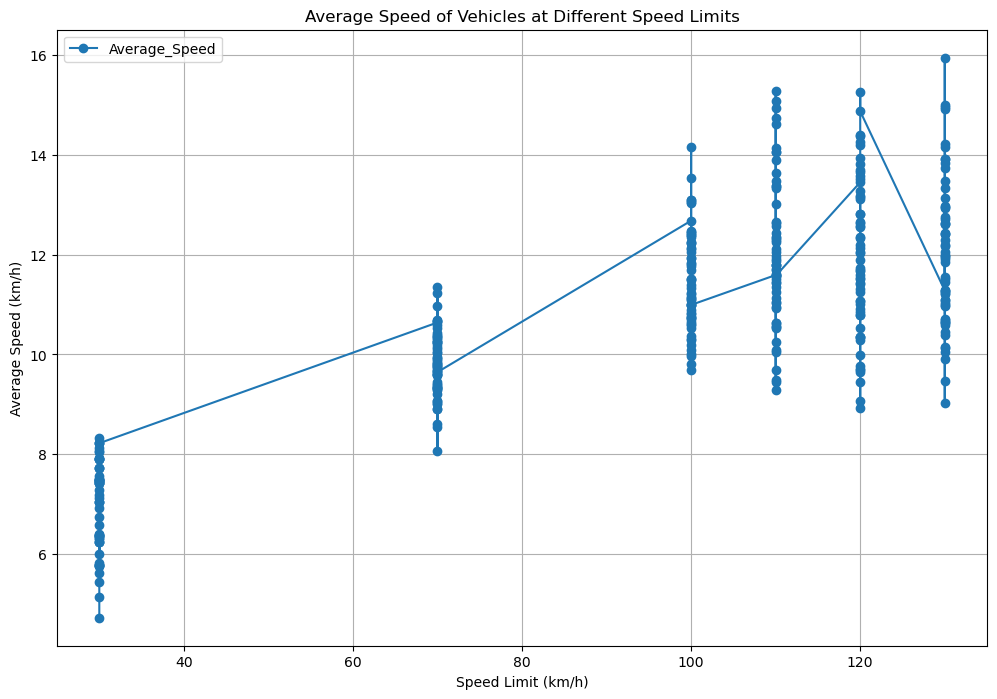

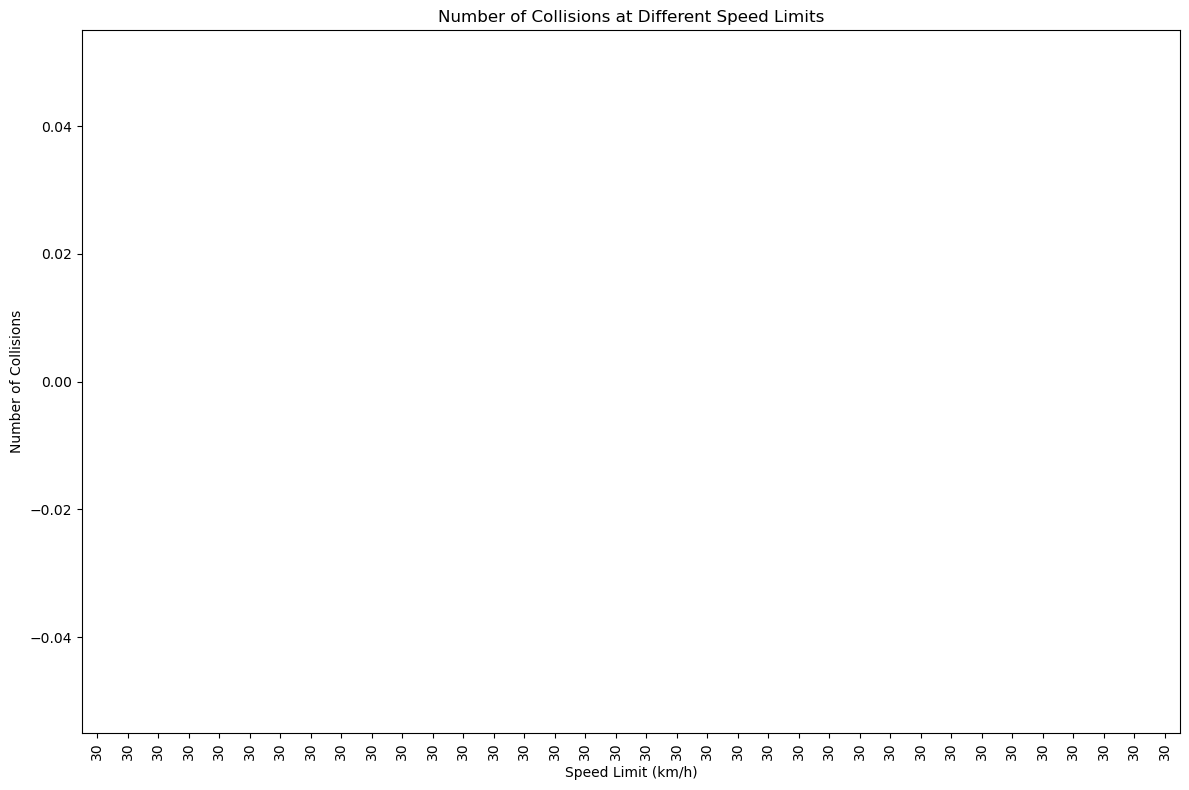

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4'

def process_speed_dir(speed_dir):
    average_speeds = []
    collisions = 0

    # Extract the speed value from the directory name
    speed = int(os.path.basename(speed_dir).replace('speed', ''))

    # List all files in the directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        # Process CSV files
        if file.endswith('.csv') and 'veh' in file:
            try:
                data = pd.read_csv(file_path)
                # Vehicle file processing
                if 'self_speed' in data.columns:
                    average_speed = data['self_speed'].mean()
                    average_speeds.append((speed, average_speed))
                else:
                    print(f"Column 'self_speed' not found in {file}")

            except Exception as e:
                print(f"Error processing file {file}: {e}")

        # Process XML files for collisions
        elif file.endswith('.xml'):
            try:
                tree = ET.parse(file_path)
                root = tree.getroot()
                collisions += sum(1 for _ in root.iter('collision'))
            except ET.ParseError as pe:
                print(f"Parse error in file {file}: {pe}")
            except Exception as e:
                print(f"General error processing file {file}: {e}")

    return average_speeds, collisions

def process_all_dirs(main_dir):
    all_average_speeds = []
    all_collisions_data = []

    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue

            average_speeds, collisions = process_speed_dir(speed_path)
            all_average_speeds.extend(average_speeds)
            all_collisions_data.append((speed, collisions))

    return all_average_speeds, all_collisions_data

def plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

def plot_collisions(collisions_data):
    df = pd.DataFrame(collisions_data, columns=['Speed', 'Collisions'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='bar', figsize=(12, 8), color='red', legend=False)
    plt.title('Number of Collisions at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Number of Collisions')
    plt.tight_layout()
    plt.show()

# Main execution
average_speeds, collisions_data = process_all_dirs(MAIN_DIR)
plot_average_speeds(average_speeds)
plot_collisions(collisions_data)


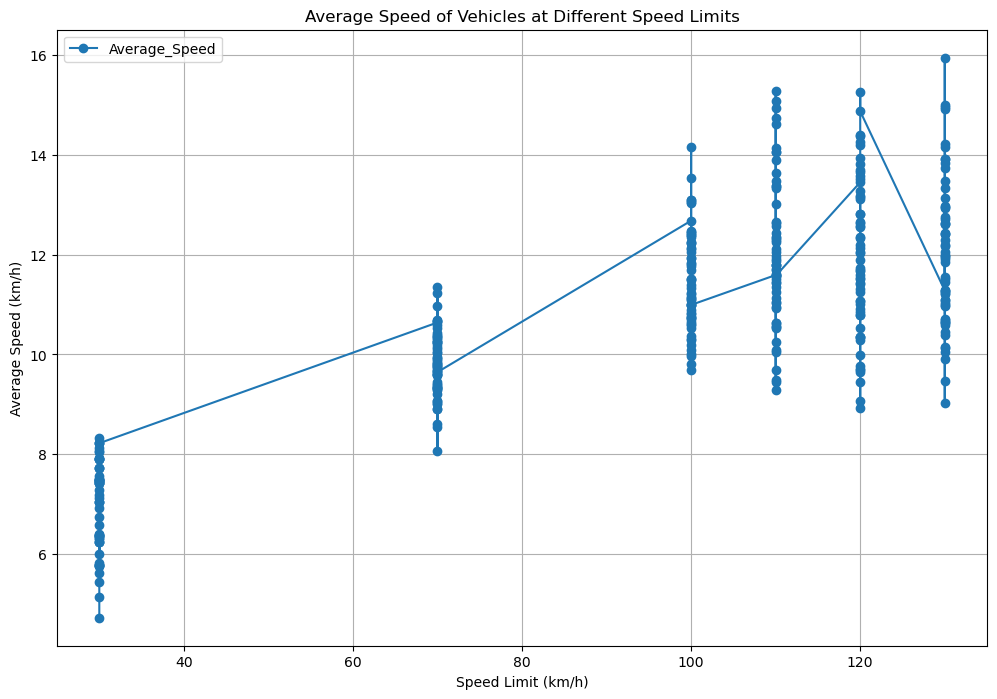

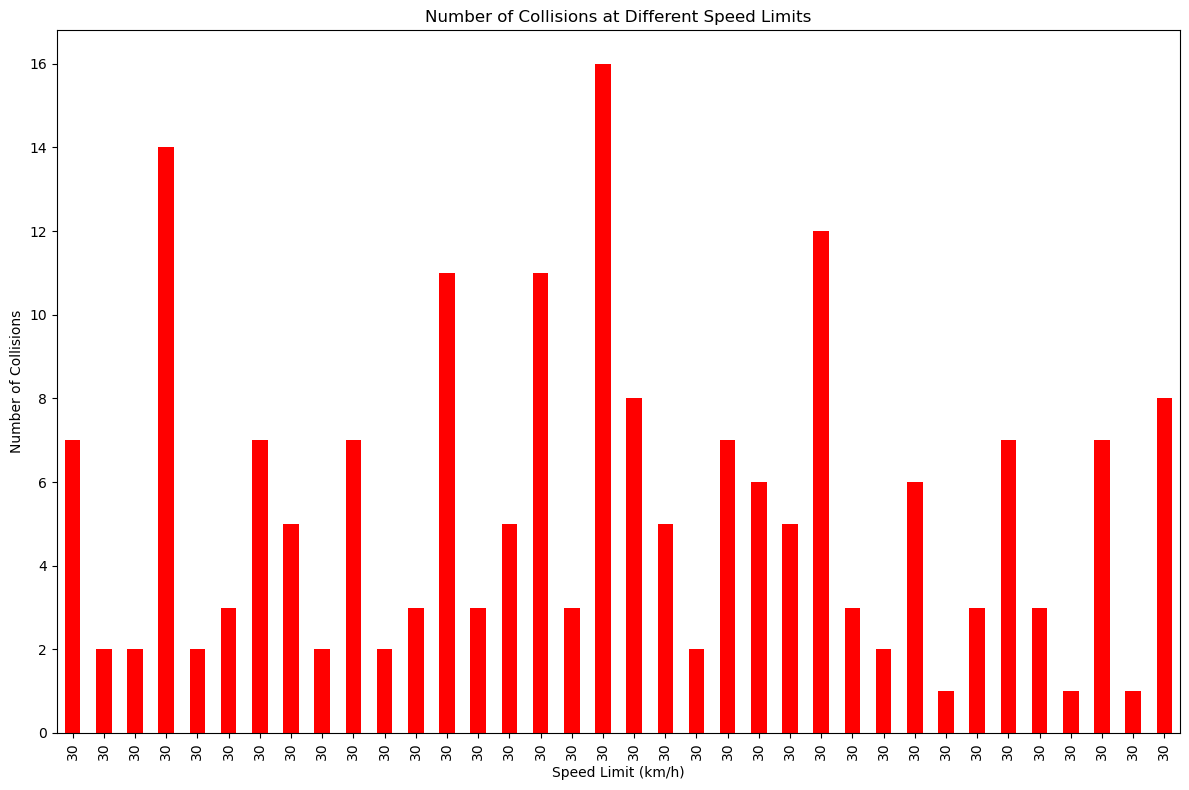

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/DataOf10Vehicles_ver1.4'

def process_speed_dir(speed_dir):
    average_speeds = []
    collisions = 0

    # Extract the speed value from the directory name
    speed = int(os.path.basename(speed_dir).replace('speed', ''))

    # List all files in the directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        # Process CSV files for vehicle data
        if file.endswith('.csv') and 'veh' in file:
            try:
                data = pd.read_csv(file_path)
                if 'self_speed' in data.columns:
                    average_speed = data['self_speed'].mean()
                    average_speeds.append((speed, average_speed))
                else:
                    print(f"Column 'self_speed' not found in {file}")
            except Exception as e:
                print(f"Error processing file {file}: {e}")

        # Process XML file for collisions
        elif file.endswith('.xml') and 'sumo-errors-or-collisions' in file:
            with open(file_path, 'r') as f:
                collisions = sum(1 for _ in f)

    return average_speeds, collisions

def process_all_dirs(main_dir):
    all_average_speeds = []
    all_collisions_data = []

    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue

            average_speeds, collisions = process_speed_dir(speed_path)
            all_average_speeds.extend(average_speeds)
            all_collisions_data.append((speed, collisions))

    return all_average_speeds, all_collisions_data

def plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

def plot_collisions(collisions_data):
    df = pd.DataFrame(collisions_data, columns=['Speed', 'Collisions'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='bar', figsize=(12, 8), color='red', legend=False)
    plt.title('Number of Collisions at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Number of Collisions')
    plt.tight_layout()
    plt.show()

# Main execution
average_speeds, collisions_data = process_all_dirs(MAIN_DIR)
plot_average_speeds(average_speeds)
plot_collisions(collisions_data)


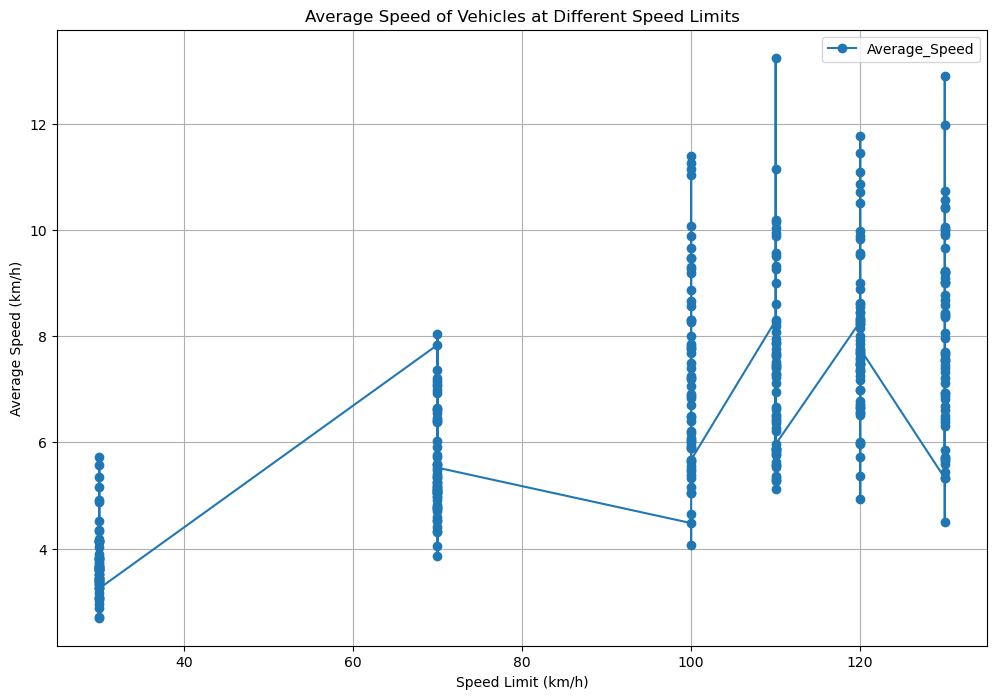

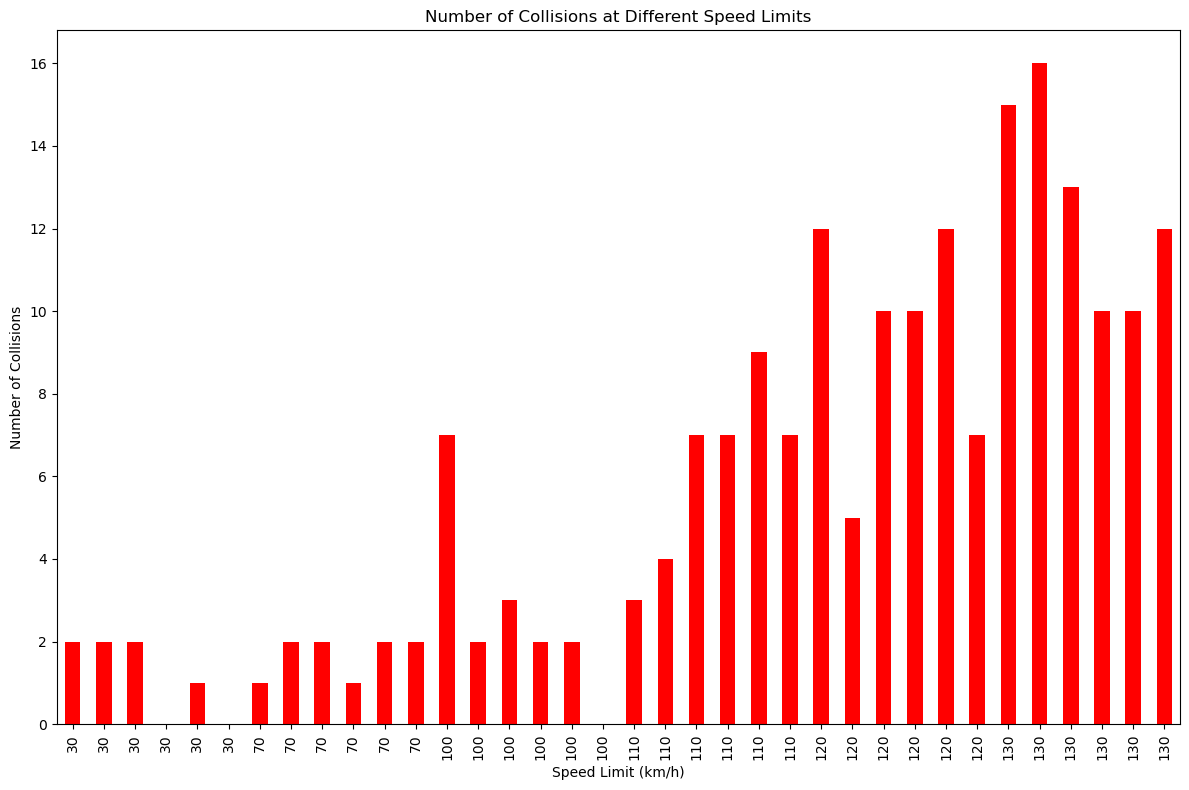

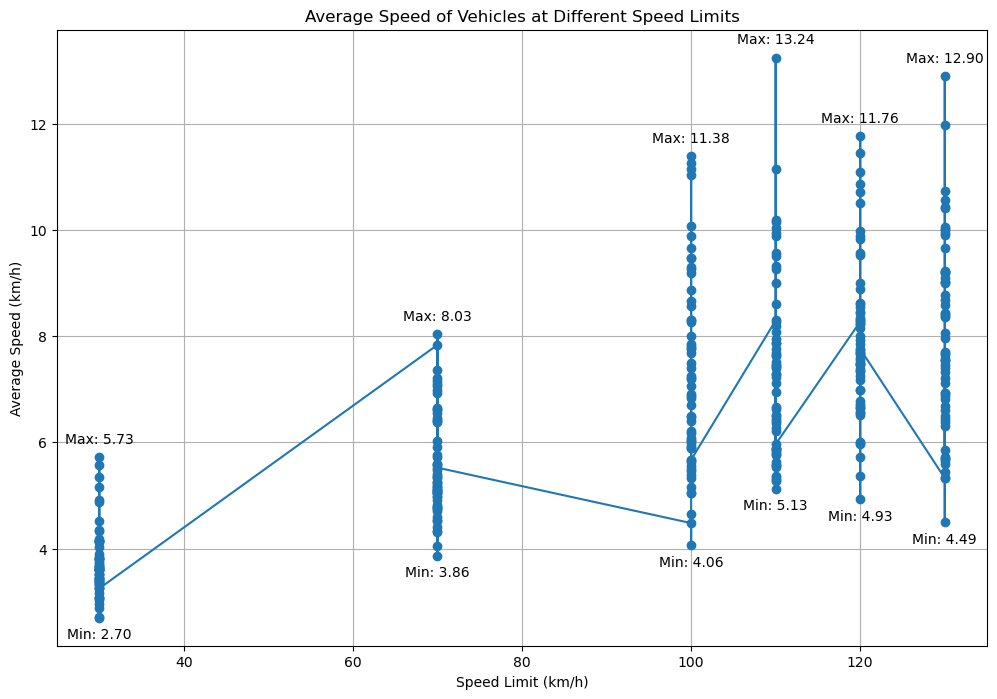

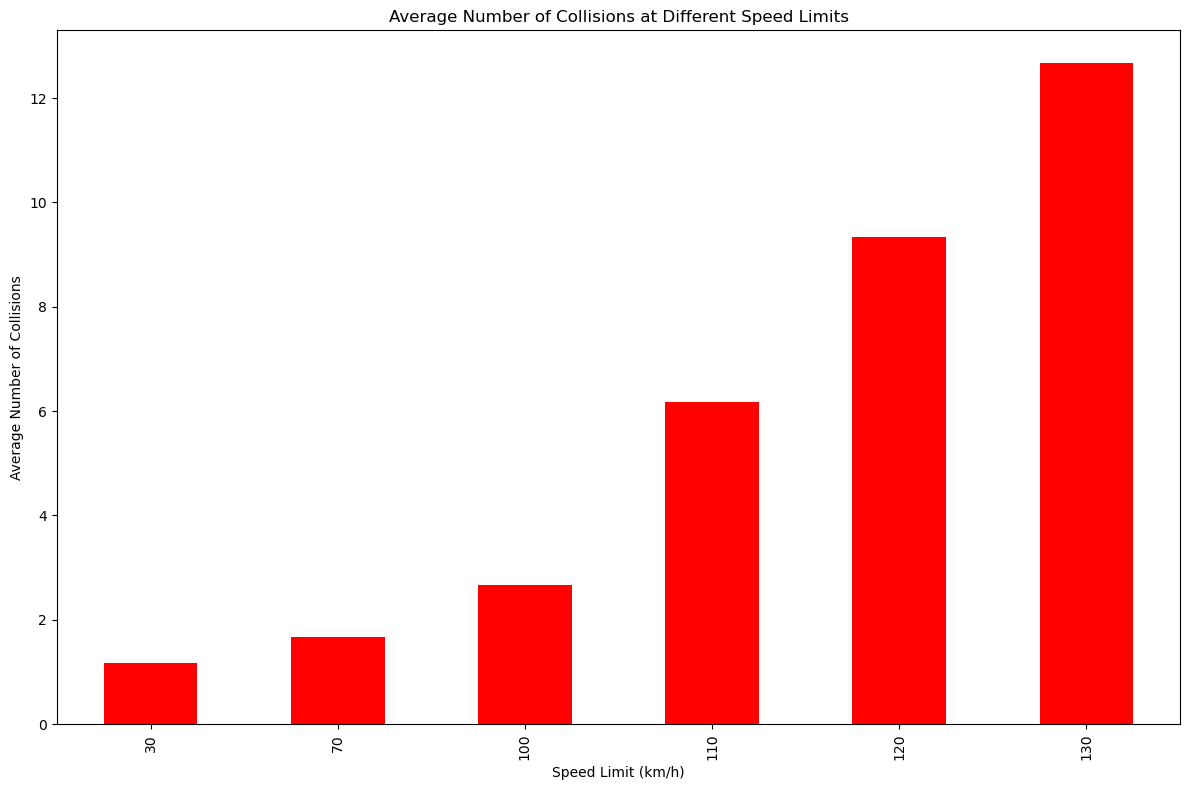

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Constants
NUMBER_OF_VEHICLES = 10
ROAD_LENGTH_KM = 4.856
MAIN_DIR = '/home/Desktop/Results_simulation_12dec2023/data1.1'

def process_speed_dir(speed_dir):
    average_speeds = []
    collisions = 0

    # Extract the speed value from the directory name
    speed = int(os.path.basename(speed_dir).replace('speed', ''))

    # List all files in the directory
    for file in os.listdir(speed_dir):
        file_path = os.path.join(speed_dir, file)

        # Process CSV files for vehicle data
        if file.endswith('.csv') and 'veh' in file:
            try:
                data = pd.read_csv(file_path)
                if 'self_speed' in data.columns:
                    average_speed = data['self_speed'].mean()
                    average_speeds.append((speed, average_speed))
                else:
                    print(f"Column 'self_speed' not found in {file}")
            except Exception as e:
                print(f"Error processing file {file}: {e}")

        # Process XML file for collisions
        elif file.endswith('.xml') and 'sumo-errors-or-collisions' in file:
            with open(file_path, 'r') as f:
                collisions = sum(1 for _ in f)

    return average_speeds, collisions

def process_all_dirs(main_dir):
    all_average_speeds = []
    all_collisions_data = []

    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue

            average_speeds, collisions = process_speed_dir(speed_path)
            all_average_speeds.extend(average_speeds)
            all_collisions_data.append((speed, collisions))

    return all_average_speeds, all_collisions_data

def plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

def plot_collisions(collisions_data):
    df = pd.DataFrame(collisions_data, columns=['Speed', 'Collisions'])
    df.set_index('Speed', inplace=True)
    df.sort_index(inplace=True)
    df.plot(kind='bar', figsize=(12, 8), color='red', legend=False)
    plt.title('Number of Collisions at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Number of Collisions')
    plt.tight_layout()
    plt.show()

    
def modified_process_all_dirs(main_dir):  # Modified function
    all_average_speeds = []
    all_collisions_data = []

    # Iterate over each time value folder
    for time_val_folder in os.listdir(main_dir):
        time_val_path = os.path.join(main_dir, time_val_folder)
        if not os.path.isdir(time_val_path):
            continue

        # Iterate over each speed subfolder within the time value folder
        for speed_folder in os.listdir(time_val_path):
            speed_path = os.path.join(time_val_path, speed_folder)
            if not os.path.isdir(speed_path) or not speed_folder.startswith('speed'):
                continue

            average_speeds, collisions = process_speed_dir(speed_path)
            all_average_speeds.extend(average_speeds)
            speed_value = int(speed_folder.replace('speed', ''))  # Extract the speed value
            all_collisions_data.append((speed_value, collisions))  # Store collisions with speed value

    return all_average_speeds, all_collisions_data
    

def modified_plot_average_speeds(average_speeds):
    df = pd.DataFrame(average_speeds, columns=['Speed', 'Average_Speed'])
    df.sort_values(by='Speed', inplace=True)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(df['Speed'], df['Average_Speed'], marker='o')

    # Annotating the highest and lowest average speeds for each speed limit
    for speed in df['Speed'].unique():
        max_speed = df[df['Speed'] == speed]['Average_Speed'].max()
        min_speed = df[df['Speed'] == speed]['Average_Speed'].min()
        plt.annotate(f'Max: {max_speed:.2f}', (speed, max_speed), textcoords="offset points", xytext=(0,10), ha='center')
        plt.annotate(f'Min: {min_speed:.2f}', (speed, min_speed), textcoords="offset points", xytext=(0,-15), ha='center')

    # Setting labels and title
    plt.title('Average Speed of Vehicles at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Speed (km/h)')
    plt.grid(True)
    plt.show()

    
def modified_plot_collisions(collisions_data):
    df = pd.DataFrame(collisions_data, columns=['Speed', 'Collisions'])
    df.sort_values(by='Speed', inplace=True)

    # Calculating average collisions for each speed limit
    avg_collisions = df.groupby('Speed')['Collisions'].mean()

    # Plotting
    plt.figure(figsize=(12, 8))
    avg_collisions.plot(kind='bar', color='red')
    plt.title('Average Number of Collisions at Different Speed Limits')
    plt.xlabel('Speed Limit (km/h)')
    plt.ylabel('Average Number of Collisions')
    plt.tight_layout()
    plt.show()
    
    
# Main execution
average_speeds, collisions_data = process_all_dirs(MAIN_DIR)
average_speeds, collisions_data = modified_process_all_dirs(MAIN_DIR)
plot_average_speeds(average_speeds)
plot_collisions(collisions_data)
modified_process_all_dirs(main_dir)
modified_plot_average_speeds(average_speeds)
modified_plot_collisions(collisions_data)
